In [1]:
from pathlib import Path
import numpy as np
import os
import numpy.linalg as la
import pandas as pd
import sys
import matplotlib.pyplot as plt

wind
AK
2
2
350
251


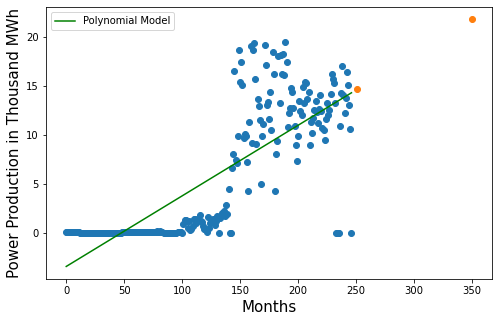

In [10]:
#Valid inputs: biomass, coal, conventional_hydroelectric, wind, nuclear, all_utility-scale_solar
#natural_gas, petroleum_liquids, hydro-electric_pumped_storage
dataset = 0
x = input()
dataset = pd.read_csv('Net_generation_for_'+x+'.csv', skiprows=5)
    
#Valid input: any state code (e.g. AK, FL, etc.)
y = input()
dataset = dataset[dataset.iloc[:,0] == 'US-'+y]
dataset = dataset.iloc[:,1:]
dataset = dataset.fillna(0)
datasetArray = dataset.to_numpy()
datasetArray = datasetArray[0]
months = np.arange(0, len(datasetArray))

#Valid input: any number >= 1
M = int(input())

#Add number of months to predict, whule the specific month numbers since January 2001. I think all datasets are 247 months
#Months assumed to be contiguous
num_months = input()
pred_months = np.arange(0, int(num_months))
for i in range(int(num_months)):
    the_input = input()
    pred_months[i] = int(the_input)

#I will cite Dr. Silva for providing some of the tools to allow me to complete this code
A = np.array([months**m for m in range(M)]).T
c = la.pinv(A)@datasetArray
pol_model = np.sum([c[i]*months**i for i in range(len(c))], axis=0)
pred_polmodel = np.sum([c[i]*pred_months**i for i in range(len(c))], axis=0)
plt.figure(figsize=(8,5))
plt.scatter(months, datasetArray)
plt.scatter(pred_months, pred_polmodel)
plt.plot(months, pol_model,'g', label='Polynomial Model')
plt.xlabel('Months', size=15)
plt.ylabel('Power Production in Thousand MWh', size=15)
plt.legend();